# Génération artificiel de nombre suivant la loi de Benford
Ce notebook à pour objectif d'implémenter différentes manière de généré des données aléatoires suivants la loi de Benford.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

import pybenford as ben

## Génération de nombres suivant la loi de Benford (premier test)
### Fonction renvoyant le nombre maximum de nombre par digit

In [2]:
def get_distibution_numbers(freq_theo, n):
    """Number of numbers per digit.
    
    Function to return the number of numbers per digit for
    generating Benford's law numbers.
    
    Parameters
    ¯¯¯¯¯¯¯¯¯¯
    freq_obs : array
        Array of observed frequency.
    n : int
        Number of numbers for genérating
        Benford's law numbers.

    Return
    ¯¯¯¯¯¯
    numbers : array of int
        Array of maximal number per digit.
        
    Example
    ¯¯¯¯¯¯¯
    get_distibution_numbers(ben.get_theoretical_freq_benford(), 500)
    array([151,  88,  62,  48,  40,  33,  29,  26,  23])
    
    """
    numbers = freq_theo * n
    for i in range(len(numbers)):
        if int(str(numbers[i])[str(numbers[i]).find(".")+1]) >= 5:
            numbers[i] = int(numbers[i]) + 1
        else:
            numbers[i] = int(numbers[i])
    return numbers.astype(int)

### Fonction générant un ensemble de nombres qui suit la loi de Benford pour le $1^{er}$ digit

In [3]:
def get_ramdom_benford(freq_obs, n, a, b):
    """Generate random numbers according to Benford's law.
    
    Function to return a random set of numbers accordind to
    the Benford's law for the first digit.
    
    Parameters
    ¯¯¯¯¯¯¯¯¯¯
    freq_theo : array
        Array of observed frequency.
    n : int
        Number of numbers for genérating
        Benford's law numbers.
    a : int
        minimum.
    b : int
        maximum.

    Return
    ¯¯¯¯¯¯
    random_benford : array of int
        Numbers according to the Benford's law
        for the first digit.
    
    """
    random_benford = []
    max_numbers = get_distibution_numbers(freq_theo, n)
    nb_numbers = np.zeros(len(max_numbers), dtype=int)

    while sum(nb_numbers) != sum(max_numbers):
        nb = random.randint(a, b)
        nb_str = str(nb)
        if nb_numbers[int(nb_str[0])-1] == max_numbers[int(nb_str[0])-1]:
            continue
        nb_numbers[int(nb_str[0])-1] += 1
        random_benford.append(nb)

    return np.array(random_benford)

In [4]:
freq_theo = ben.get_theoretical_freq_benford()
n = 2000
a = 1
b = 100

In [5]:
%%time
rd_benford = get_ramdom_benford(freq_theo, n, a, b)
rd_benford

CPU times: user 53.5 ms, sys: 273 µs, total: 53.8 ms
Wall time: 53.4 ms


array([90, 90, 20, ...,  1,  1, 10])

### Vérification que l'ensemble de nombres généré aléatoirement suit la loi de Benford pour le premier digit

In [6]:
first_digit = ben.count_first_digit(rd_benford)
first_digit

array([602, 352, 250, 194, 158, 134, 116, 102,  92])

In [7]:
freq_frist_digit = ben.normalize_first_digit(first_digit)

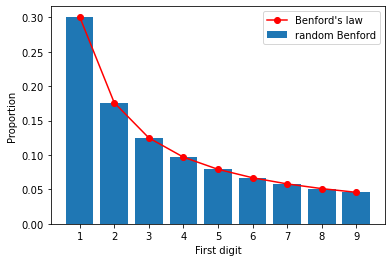

In [8]:
ben.build_hist_freq_ben(ben.normalize_first_digit(first_digit),
                        ben.get_theoretical_freq_benford(), 1,
                        legend="random Benford")

In [9]:
%%time
ben.calculate_bootstrap_chi2(rd_benford, ben.get_theoretical_freq_benford(), 1)

statistics : 4.051493793890268 ; p-value : 0.8524478617963812
CPU times: user 2.28 s, sys: 404 µs, total: 2.28 s
Wall time: 2.28 s


(4.051493793890268, 0.8524478617963812)

L'ensemble de nombre généré aléatoirement suit la loi de Benford pour le premier digit.

### Vérification que l'ensemble de nombres généré aléatoirement suit la loi de Benford pour les 2 premiers digits

In [10]:
first_digit = ben.count_first_digit(rd_benford, 2)
first_digit

array([111,  40,  43,  49,  49,  51,  63,  53,  41,  51,  29,  41,  31,
        31,  23,  31,  37,  34,  33,  28,  22,  28,  22,  31,  25,  21,
        12,  25,  23,  23,  21,  16,  19,  25,  20,  15,  13,  20,  16,
        13,  19,  19,  23,  13,   9,  10,  15,   8,  14,  11,  12,  10,
        11,  14,  15,  12,   5,  16,  13,  13,  13,  15,   8,  10,  15,
         7,  12,  11,   6,  10,  12,   8,  10,  12,  12,   7,   9,  15,
         5,   3,  12,   9,   9,   7,   9,   8,   5,   6,   8,   6])

In [11]:
freq_frist_digit = ben.normalize_first_digit(first_digit)
freq_frist_digit

array([0.06098901, 0.02197802, 0.02362637, 0.02692308, 0.02692308,
       0.02802198, 0.03461538, 0.02912088, 0.02252747, 0.02802198,
       0.01593407, 0.02252747, 0.01703297, 0.01703297, 0.01263736,
       0.01703297, 0.02032967, 0.01868132, 0.01813187, 0.01538462,
       0.01208791, 0.01538462, 0.01208791, 0.01703297, 0.01373626,
       0.01153846, 0.00659341, 0.01373626, 0.01263736, 0.01263736,
       0.01153846, 0.00879121, 0.01043956, 0.01373626, 0.01098901,
       0.00824176, 0.00714286, 0.01098901, 0.00879121, 0.00714286,
       0.01043956, 0.01043956, 0.01263736, 0.00714286, 0.00494505,
       0.00549451, 0.00824176, 0.0043956 , 0.00769231, 0.00604396,
       0.00659341, 0.00549451, 0.00604396, 0.00769231, 0.00824176,
       0.00659341, 0.00274725, 0.00879121, 0.00714286, 0.00714286,
       0.00714286, 0.00824176, 0.0043956 , 0.00549451, 0.00824176,
       0.00384615, 0.00659341, 0.00604396, 0.0032967 , 0.00549451,
       0.00659341, 0.0043956 , 0.00549451, 0.00659341, 0.00659

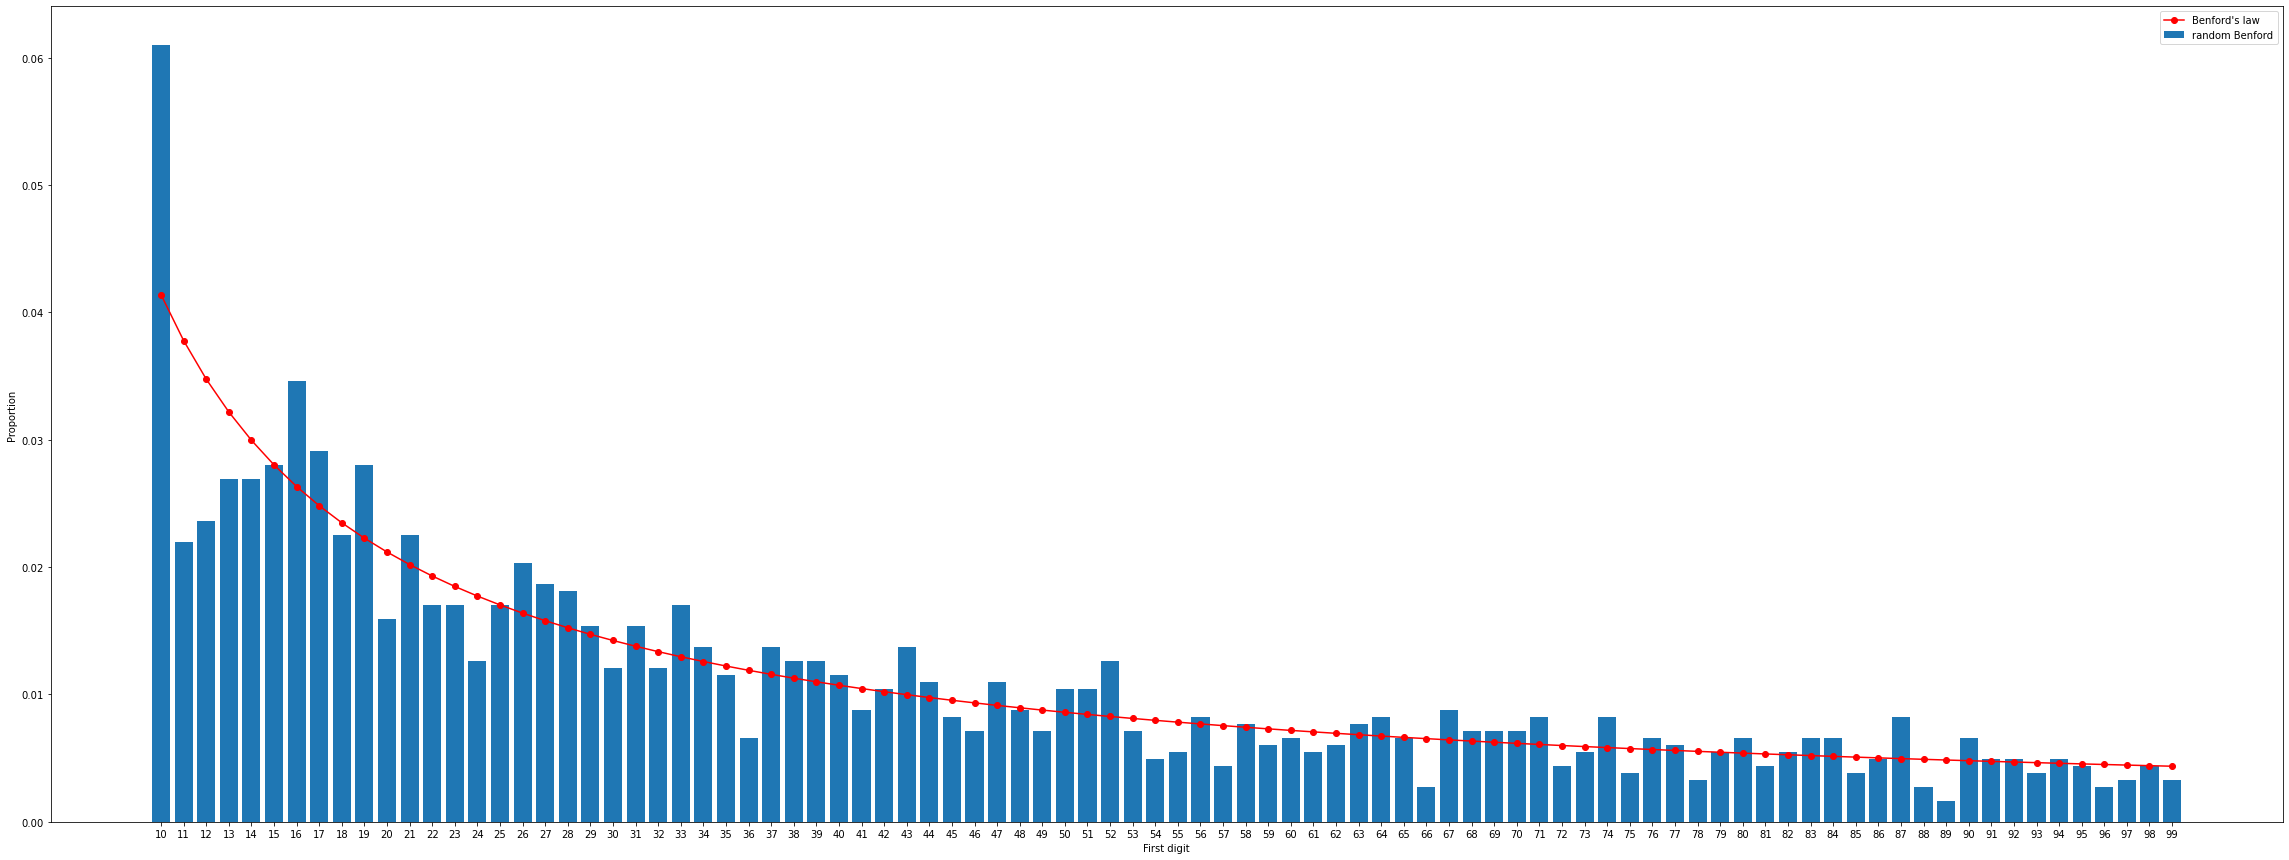

In [12]:
ben.build_hist_freq_ben(ben.normalize_first_digit(first_digit),
                        ben.get_theoretical_freq_benford(2), 2,
                        legend="random Benford", size=(40, 15))

In [13]:
%%time
ben.calculate_bootstrap_chi2(rd_benford, ben.get_theoretical_freq_benford(2), 2)

statistics : 101.3663644277924 ; p-value : 0.17448598081105363
CPU times: user 2.41 s, sys: 7.99 ms, total: 2.42 s
Wall time: 2.42 s


(101.3663644277924, 0.17448598081105363)

Visuellement l'ensembe de nombre généré ne semble pas suivre la loi de Benford. Dans certains cas le test statistique est non significatif, alors que visuellement cela ne semble pas suivre la loi de benford. Cela dépend de l'ensemble de nombre généré aléatoirement.

En conclusion, on peut générer un ensemble de nombre qui sui la loi de Benford pour le premier digit mais pas pour les 2 premiers ou les n premiers digits avec cette méthode.

## Génération de nombres avec l'utilisation d'une distribution d'une loi log-normal
### premier test
génération de 1 000 nombres suivant la loi de Benford en utilisant une loi log-normal de moyenne 5 et d'écart-type 5.

In [14]:
test = np.random.lognormal(mean=5, sigma=5, size=1000)

In [15]:
print(f"Mean of test : {np.mean(test)}")
print(f"Median of test : {np.median(test)}")
print(f"Variance of test : {np.var(test)}")
print(f"Standard deviation of test : {np.sqrt(np.var(test))}")
print("\n")
print(f"Mean of test : {np.log(np.mean(test))}")
print(f"Median of test : {np.log(np.median(test))}")
print(f"Variance of test : {np.log(np.var(test))}")
print(f"Standard deviation of test : {np.log(np.sqrt(np.var(test)))}")

Mean of test : 50232799.47250624
Median of test : 167.3629295174544
Variance of test : 1.2231984246976015e+18
Standard deviation of test : 1105983012.8431456


Mean of test : 17.73217874725116
Median of test : 5.120164685010253
Variance of test : 41.64800076167121
Standard deviation of test : 20.824000380835606


In [16]:
print(len(test)); print(min(test)); print(max(test));
print("\n"); ben.calculate_oom(test);

1000
6.504422272873505e-06
32784023939.859722


POM : 5040266846847336.0
OOM : 15.70245352990693


In [17]:
d_obs = ben.count_first_digit(test)
print(d_obs)
f_obs = ben.normalize_first_digit(d_obs)
print(f_obs)
print(sum(d_obs))

[281 132 114  71  67  53  42  52  36]
[0.33136792 0.15566038 0.13443396 0.08372642 0.07900943 0.0625
 0.0495283  0.06132075 0.04245283]
848


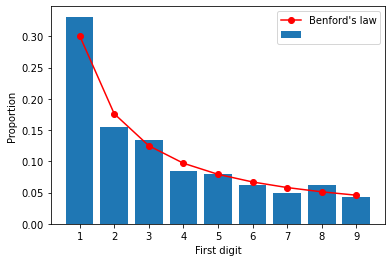

In [18]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(), 1)

In [19]:
ben.chi2_test(test, ben.get_theoretical_freq_benford())

statistics : 31.541946549223464 ; p-value : 0.00011247777756646204


(31.541946549223464, 0.00011247777756646204)

In [20]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(1), 1)

statistics : 31.54194654922326 ; p-value : 0.0001124777775664715


(31.54194654922326, 0.0001124777775664715)

On ne suit pas la loi de Benford pour le premier digit avec 1000 valeurs tirées aléatoirement dans une loi log-normal de moyenne 5 et d'écart-type 5. 

In [21]:
d_obs = ben.count_first_digit(test, 2)
f_obs = ben.normalize_first_digit(d_obs)
print(sum(d_obs))

707


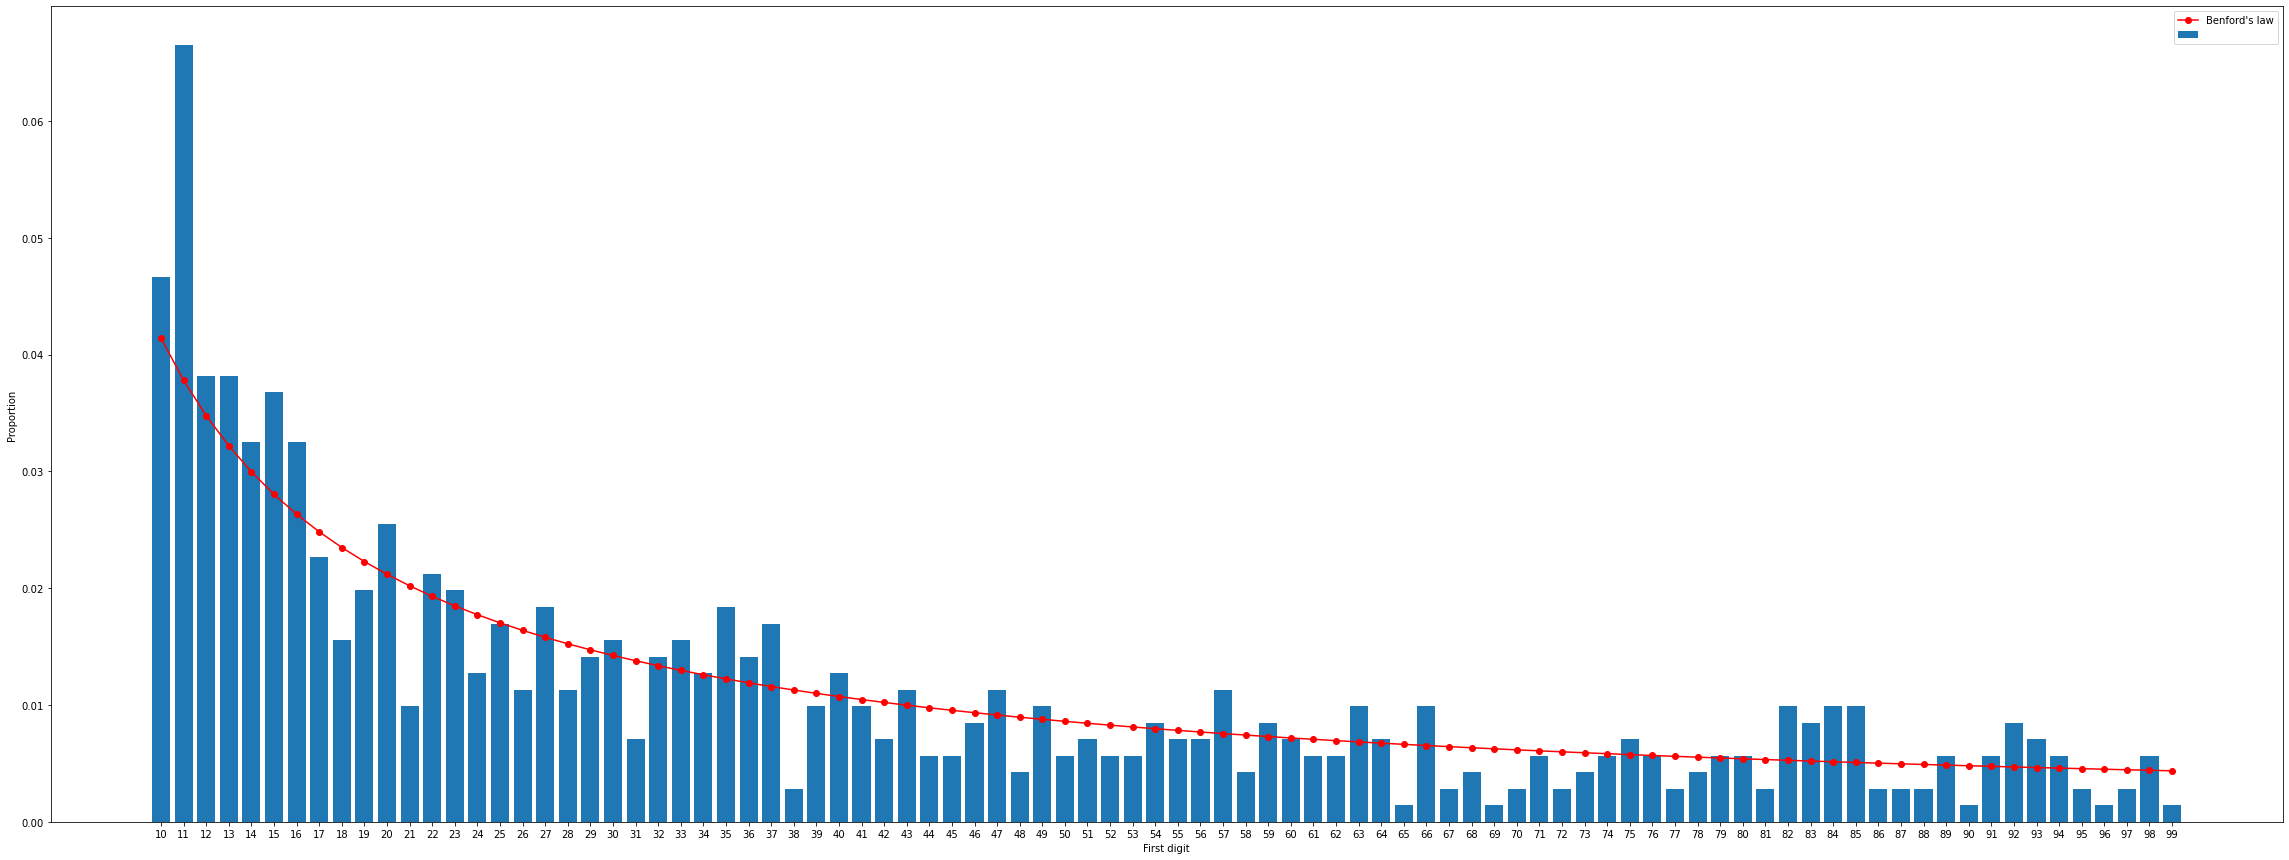

In [22]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(2), 2,  size=(40, 15))

In [23]:
ben.chi2_test(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 148.54100829989008 ; p-value : 7.746328907303957e-05


(148.54100829989008, 7.746328907303957e-05)

In [24]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 148.54100829988846 ; p-value : 7.746328907306459e-05


(148.54100829988846, 7.746328907306459e-05)

On ne suit pas la loi de Benford pour les 2 premiers digit avec 1000 valeurs tirées aléatoirement dans une loi log-normal de moyenne 5 et d'écart-type 5. 

### Second test

génération de 10 000 nombres suivant la loi de Benford en utilisant une loi log-normal de moyenne 5 et d'écart-type 2.

In [25]:
test = np.random.lognormal(mean=5, sigma=2, size=10000)

In [26]:
print(f"Mean of test : {np.mean(test)}")
print(f"Median of test : {np.median(test)}")
print(f"Variance of test : {np.var(test)}")
print(f"Standard deviation of test : {np.sqrt(np.var(test))}")
print("\n")
print(f"Mean of test : {np.log(np.mean(test))}")
print(f"Median of test : {np.log(np.median(test))}")
print(f"Variance of test : {np.log(np.var(test))}")
print(f"Standard deviation of test : {np.log(np.sqrt(np.var(test)))}")

Mean of test : 1073.2139926271122
Median of test : 146.55081672553894
Variance of test : 39491531.9059197
Standard deviation of test : 6284.228823485003


Mean of test : 6.978413156695239
Median of test : 4.987372240157673
Variance of test : 17.4915968247596
Standard deviation of test : 8.7457984123798


In [27]:
print(len(test)); print(min(test)); print(max(test)); 
print("\n"); ben.calculate_oom(test);

10000
0.08289770262691183
417595.1414737038


POM : 5037475.445527438
OOM : 6.70221294224635


In [28]:
d_obs = ben.count_first_digit(test)
print(d_obs)
f_obs = ben.normalize_first_digit(d_obs)
print(f_obs)
print(sum(d_obs))

[3022 1721 1253  988  753  678  586  489  433]
[0.304545   0.17343545 0.1262723  0.09956666 0.07588431 0.06832611
 0.05905472 0.04927945 0.043636  ]
9923


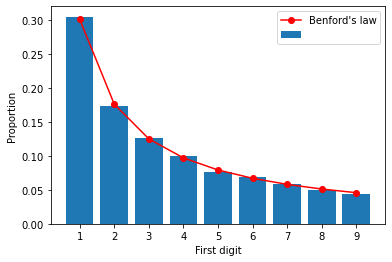

In [29]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(), 1)

In [30]:
ben.chi2_test(test, ben.get_theoretical_freq_benford())

statistics : 5.71588919255856 ; p-value : 0.679021726208799


(5.71588919255856, 0.679021726208799)

In [31]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(1), 1)

statistics : 7.772837794419484 ; p-value : 0.45596887988940893


(7.772837794419484, 0.45596887988940893)

Les 10 000 nombres, tirés aléatoirement dans un loi log-normal de moyenne 5 et d'écart-type 2, suit la loi de Benford pour le premiers digit.

In [32]:
d_obs = ben.count_first_digit(test, 2)
f_obs = ben.normalize_first_digit(d_obs)
print(sum(d_obs))

9099


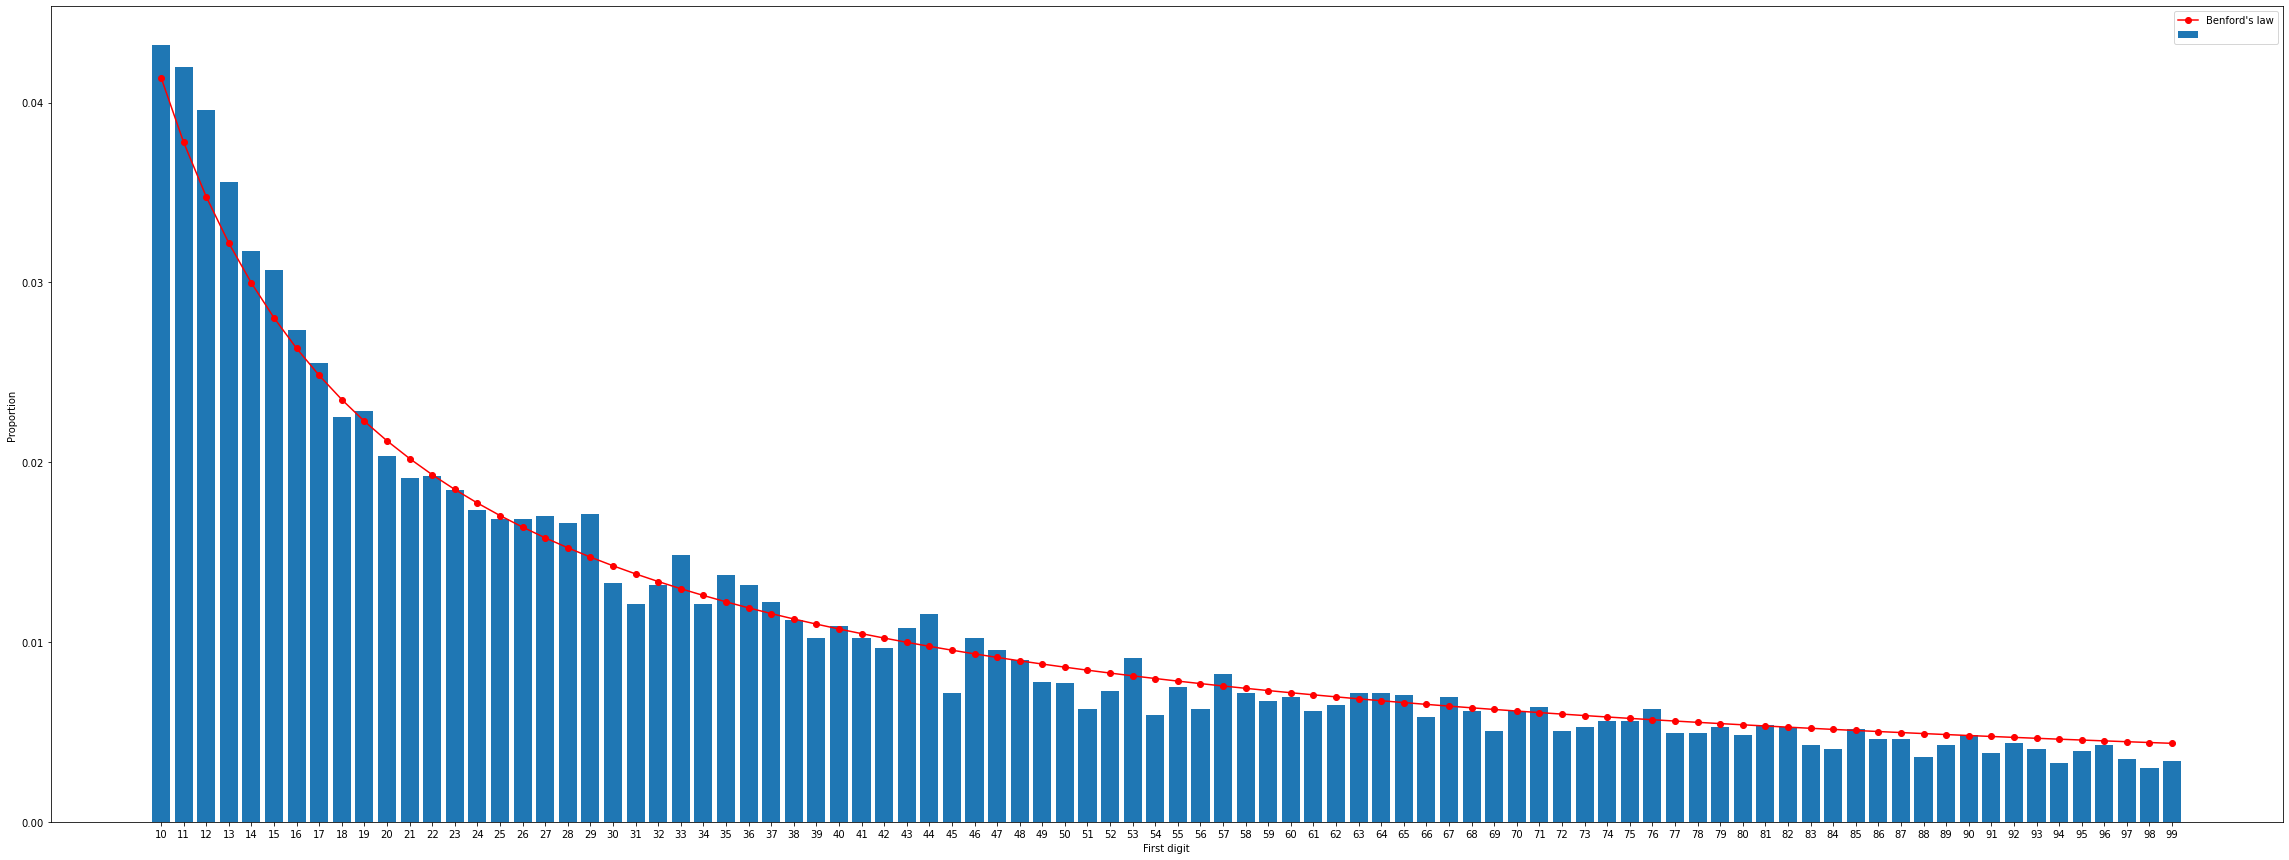

In [33]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(2), 2,  size=(40, 15))

In [34]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 86.80775044827897 ; p-value : 0.546009787108712


(86.80775044827897, 0.546009787108712)

Les 10 000 nombres, tirés aléatoirement dans un loi log-normal de moyenne 5 et d'écart-type 2, suit la loi de Benford pour les 2 premiers digit.

# Conclusion

L'utilisation d'une loi log-normal pour générer des nombres suivant la loi de Benford est le plus adaptée. Avec une moyenne de 5, un écart-type de 2 et 10 000 nombres tirés aléatoirements on obtient un ensemble de nombre qui suit la loi de Benford.  

Il reste néanmoins à déterminer quels paramétres utiliser pour pouvoir l'implémenter dans le module pybenford.